# Data Exploration on Netflix Prize Data

## Initialize

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# define the paths
data_path = '../data/NetflixPrize/'

### Read Data

In [3]:
df_test = pd.read_csv(data_path+'combined_data_1.txt',names=['user_id', 'rating', 'date', 'movie_id'])
# df_test_2 = pd.read_csv(data_path+'combined_data_1.txt',names=['user_id', 'rating', 'date', 'movie_id'])
# df_test_3 = pd.read_csv(data_path+'combined_data_1.txt',names=['user_id', 'rating', 'date', 'movie_id'])
# df_test_4 = pd.read_csv(data_path+'combined_data_1.txt',names=['user_id', 'rating', 'date', 'movie_id'])
# df_test = pd.concat([df_test,df_test_2,df_test_3,df_test_4])
df_test.head()

/Users/stellalam/opt/anaconda3/envs/project3362/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,rating,date,movie_id
0,1:,NaN,NaN,NaN
1,1488844,3.0,2005-09-06,NaN
2,822109,5.0,2005-05-13,NaN
3,885013,4.0,2005-10-19,NaN
4,30878,4.0,2005-12-26,NaN


### Clean up data
From `df.head()`, we can see that the movies id are converted as `uid: '1:'` with `rating: NaN`, `date: NaN`, and `movie_id: NaN`, and the date haven't appeared. Therefore, we will modify the it to be 4 columns: `movie`, `uid`, `rating`, `date`.

In [4]:
# # Lets make a copy of them first
# import shutil
# for i in range(1,5):
#   shutil.copyfile(data_path+f'combined_data_{i}.txt',data_path+f'data_{i}.txt')
# print('done')

In [5]:
# # Modify the the first row to NaN NaN NaN 1
# import re

# pat = r'\d+:'
# def func(s):
#   if s.group():
#     return ',,,'+ s.group()[:-1]
#   else:
#     ''

# for i in range(1,5): 
#   with open(data_path+f"data_{i}.txt", mode="r+") as f:
#     content = f.read()
#     content = re.sub(pat,func,content)
#     f.seek(0)
#     f.write(content)
#     f.truncate()
    
# print('done')

In [6]:
# load data (comment df_2, df_3, df_4 and last line if you want to reduce the loading time)
df = pd.read_csv(data_path+'data_1.txt',names=['user_id', 'rating', 'date', 'movie_id'])
df_2 = pd.read_csv(data_path+'data_2.txt',names=['user_id', 'rating', 'date', 'movie_id'])
df_3 = pd.read_csv(data_path+'data_3.txt',names=['user_id', 'rating', 'date', 'movie_id'])
df_4 = pd.read_csv(data_path+'data_4.txt',names=['user_id', 'rating', 'date', 'movie_id'])
df = pd.concat([df,df_2,df_3,df_4])

In [52]:
df['movie_id'] = df['movie_id'].fillna(method='ffill')
df['rating'] = df['rating'].astype(int)
df['movie_id'] = df['movie_id'].astype(int)
# drop the rows with NaN 
df = df.dropna()
df['user_id'] = df['user_id'].astype(int)
df

,user_id,rating,date,movie_id
1,1488844,3,2005-09-06,1
2,822109,5,2005-05-13,1
3,885013,4,2005-10-19,1
4,30878,4,2005-12-26,1
5,823519,3,2004-05-03,1
...,...,...,...,...
26851921,1790158,4,2005-11-01,17770
26851922,1608708,3,2005-07-19,17770
26851923,234275,1,2004-08-07,17770
26851924,255278,4,2004-05-28,17770


Now, there is no `user_id` with expression `r'\d+:'`, and all `NaN` values are dropped.

## Start Exploration

### General Simple Details
In this section, we will find the number of users, ratings, unique dates and movies in the dataset

In [41]:
m_movies = df['movie_id'].nunique()
n_users = df['user_id'].nunique()
n_ratings = len(df)
n_unique_dates = df['date'].nunique()

In [42]:
print(f"Nnumber of movies: {m_movies}")
print(f"Number of users: {n_users}")
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique dates: {n_unique_dates}")

Nnumber of movies: 17770
Number of users: 480189
Number of ratings: 100480507
Number of unique dates: 2182


### Variables Studies
In this section, we try to find the details of the rating variable.

In [71]:
group_by_rating = df.groupby('rating')
rating_counts = group_by_rating.count()
print(rating_counts)
ratings = rating_counts['movie_id']
print(ratings)
ratings.describe()

         user_id      date  movie_id
rating                              
1        4617990   4617990   4617990
2       10132080  10132080  10132080
3       28811247  28811247  28811247
4       33750958  33750958  33750958
5       23168232  23168232  23168232
rating
1     4617990
2    10132080
3    28811247
4    33750958
5    23168232
Name: movie_id, dtype: int64


count    5.000000e+00
mean     2.009610e+07
std      1.235618e+07
min      4.617990e+06
25%      1.013208e+07
50%      2.316823e+07
75%      2.881125e+07
max      3.375096e+07
Name: movie_id, dtype: float64

rating
1     4.595906
2    10.083627
3    28.673469
4    33.589558
5    23.057439
Name: movie_id, dtype: float64


<AxesSubplot:title={'center':'Percentage of each rating'}, xlabel='rating', ylabel='Percentage'>

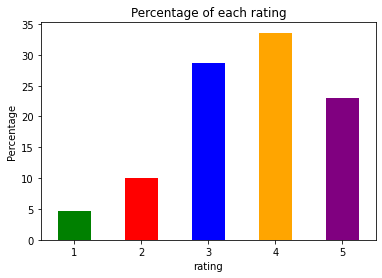

In [64]:
percentage = ratings/n_ratings*100
print(percentage)
percentage.plot.bar(color=['green','red','blue','orange','purple'], title='Percentage of each rating', ylabel='Percentage', rot=1)

We can see that most users rate the movie with score 3 and 4 with total around 61%.

In [75]:
group_by_movies = df.groupby('movie_id')
movies_counts = group_by_movies.count()
print(movies_counts)
movies = movies_counts['rating']
print(movies)
movies.describe()

          user_id  rating  date
movie_id                       
1             547     547   547
2             145     145   145
3            2012    2012  2012
4             142     142   142
5            1140    1140  1140
...           ...     ...   ...
17766         605     605   605
17767         204     204   204
17768        1362    1362  1362
17769        6749    6749  6749
17770         921     921   921

[17770 rows x 3 columns]
movie_id
1         547
2         145
3        2012
4         142
5        1140
         ... 
17766     605
17767     204
17768    1362
17769    6749
17770     921
Name: rating, Length: 17770, dtype: int64


count     17770.000000
mean       5654.502364
std       16909.673269
min           3.000000
25%         192.000000
50%         561.000000
75%        2667.750000
max      232944.000000
Name: rating, dtype: float64